# Geely Auto Case Study

Problem statement:
    
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and 
producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends.
Specifically, they want to understand the factors affecting the pricing of cars in the American market, 
since those may be very different from the Chinese market. The company wants to know:

1)Which variables are significant in predicting the price of a car

2)How well those variables describe the price of a car

## Reading,understanding and visualizing Data

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [110]:
gly = pd.read_csv("C:/Users/Jitmanyu/Desktop/CarPrice_Assignment.csv")

In [111]:
gly.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [112]:
gly.shape

(205, 26)

In [113]:
gly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [114]:
gly.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Data cleaning

##### (A) CHECK for Duplicate values in a dataset

In [115]:
sum(gly.duplicated(subset = 'car_ID')) == 0

True

##### (B) CHECK for NULL and NAN values in dataset

In [116]:
round(100*(gly.isnull().sum()/len(gly.index)), 2)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

##### (C) Splitting Carname column to remove the model name.

There is a variable named CarName which is comprised of two parts - the first part is the name of 'car company' and 
the second is the 'car model'.

Only company name has to be considered as the independent variable for building model.

In [117]:
gly['CarName'] = gly['CarName'].str.strip()
gly[['CompanyName', 'Model']] = gly['CarName'].str.split(' ', n=1, expand=True)
gly.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,Model
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


###### As columns Carname, Car Id and Model are not required for building a model we drop these columns

In [118]:
gly.drop(['CarName', 'car_ID', 'Model'],axis=1,inplace=True)
gly.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


###### After extracting Company from the CarName column,there are few discrepancies in the Company names.Also there are disperancies in fuelsystem and enginetype columns.We shall replace incorrect names with the correct names 

In [119]:
gly['CompanyName'] = gly['CompanyName'].str.replace('vw','volkswagen') 
gly['CompanyName'] = gly['CompanyName'].str.replace('vokswagen','volkswagen') 
gly['CompanyName'] = gly['CompanyName'].str.replace('toyouta','toyota') 
gly['CompanyName'] = gly['CompanyName'].str.replace('porcshce','porsche') 
gly['CompanyName'] = gly['CompanyName'].str.replace('maxda','mazda')
gly['CompanyName'] = gly['CompanyName'].str.replace('alfa-romero','alfa romeo')
gly["fuelsystem"]= gly["fuelsystem"].str.replace('mfi', 'mpfi')
gly["fuelsystem"]= gly["fuelsystem"].str.replace('spdi', 'spfi')
gly["enginetype"]= gly["enginetype"].str.replace('dohcv', 'dohc')
gly.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa romeo
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa romeo
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa romeo
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


### Dealing with categorical variables

##### We will generate dummy for Categorical variables which has 2 levels instead for assigning binary values for the ease of understanding

In [120]:
gly = pd.get_dummies(gly, columns =['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype', 'cylindernumber','fuelsystem','CompanyName'], drop_first = True)
gly.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0


## Perform train-test split

In [121]:
import sklearn
from sklearn.model_selection import train_test_split
gly_train,gly_test = train_test_split(gly, train_size = 0.7, random_state = 100)
print(gly_train.shape)
print(gly_test.shape)
gly_train.info()

(143, 63)
(62, 63)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 63 columns):
symboling                 143 non-null int64
wheelbase                 143 non-null float64
carlength                 143 non-null float64
carwidth                  143 non-null float64
carheight                 143 non-null float64
curbweight                143 non-null int64
enginesize                143 non-null int64
boreratio                 143 non-null float64
stroke                    143 non-null float64
compressionratio          143 non-null float64
horsepower                143 non-null int64
peakrpm                   143 non-null int64
citympg                   143 non-null int64
highwaympg                143 non-null int64
price                     143 non-null float64
fueltype_gas              143 non-null uint8
aspiration_turbo          143 non-null uint8
doornumber_two            143 non-null uint8
carbody_hardtop           143 non-null uint8
carbo

### Dealing with Numeric variables

##### Create a function to normalize variables

In [122]:
norm_cols = ['symboling', 'wheelbase','carlength','carwidth' ,'carheight','curbweight','enginesize', 'boreratio', 'stroke','compressionratio','horsepower',
             'peakrpm','citympg', 'highwaympg','price']
gly_norm = gly[norm_cols].apply(lambda x: (x-np.mean(x))/ (max(x) - min(x)))
gly_norm.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.433171,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,0.011671,0.100174,-0.274007,-0.071409,0.028679,-0.051070,-0.117209,-0.098716,0.005419
1,0.433171,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,0.011671,0.100174,-0.274007,-0.071409,0.028679,-0.051070,-0.117209,-0.098716,0.080018
2,0.033171,-0.124099,-0.042526,-0.033984,-0.110407,0.103737,0.094689,-0.464111,0.102184,-0.071409,0.207846,-0.051070,-0.172764,-0.125032,0.080018
3,0.233171,0.030420,0.038071,0.024350,0.047927,-0.084781,-0.067575,-0.099826,0.068850,-0.008909,-0.008821,0.153011,-0.033875,-0.019769,0.016714
4,0.233171,0.018758,0.038071,0.041016,0.047927,0.104125,0.034312,-0.099826,0.068850,-0.133909,0.045346,0.153011,-0.200542,-0.230295,0.103602


Normalizing Numeric columns in the dataset

In [123]:
gly_train['symboling'] = gly_norm['symboling']
gly_train['wheelbase'] = gly_norm['wheelbase']
gly_train['carlength'] = gly_norm['carlength']
gly_train['carwidth'] = gly_norm['carwidth']
gly_train['carheight'] = gly_norm['carheight']
gly_train['curbweight'] = gly_norm['curbweight']
gly_train['enginesize'] = gly_norm['enginesize']
gly_train['boreratio'] = gly_norm['boreratio']
gly_train['stroke'] = gly_norm['stroke']
gly_train['compressionratio'] = gly_norm['compressionratio']
gly_train['horsepower'] = gly_norm['horsepower']
gly_train['peakrpm']= gly_norm['peakrpm']
gly_train['citympg'] = gly_norm['citympg']
gly_train['highwaympg'] = gly_norm['highwaympg']
gly_train['price'] = gly_norm['price']

gly_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
122,0.033171,-0.147422,-0.100735,-0.175650,-0.243740,-0.141414,-0.109084,-0.256969,-0.012102,-0.046409,...,0,0,1,0,0,0,0,0,0,0
125,0.433171,-0.124099,-0.076855,0.199350,-0.293740,0.086282,0.090916,0.435889,-0.069245,-0.040159,...,0,0,0,1,0,0,0,0,0,0
166,0.033171,-0.124099,-0.079840,-0.158984,-0.093740,-0.099133,-0.109084,-0.064111,-0.083531,-0.046409,...,0,0,0,0,0,0,0,1,0,0
1,0.433171,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,0.011671,0.100174,-0.274007,-0.071409,...,0,0,0,0,0,0,0,0,0,0
199,-0.366829,0.161616,0.220160,0.107683,0.314593,0.233295,0.011671,0.207317,-0.050197,-0.165159,...,0,0,0,0,0,0,0,0,0,1


## Building a Model

### Use RFE to reduce the number of features in training dataset

In [124]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
y_train = gly_train.pop('price')
x_train = gly_train

In [125]:
#Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(x_train,y_train)
rfe = RFE(lm,15)
rfe = rfe.fit(x_train,y_train)

In [126]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 40),
 ('wheelbase', False, 11),
 ('carlength', False, 15),
 ('carwidth', True, 1),
 ('carheight', False, 12),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 20),
 ('horsepower', False, 46),
 ('peakrpm', False, 8),
 ('citympg', False, 28),
 ('highwaympg', False, 7),
 ('fueltype_gas', False, 19),
 ('aspiration_turbo', False, 10),
 ('doornumber_two', False, 36),
 ('carbody_hardtop', False, 22),
 ('carbody_hatchback', False, 21),
 ('carbody_sedan', False, 23),
 ('carbody_wagon', False, 24),
 ('drivewheel_fwd', False, 42),
 ('drivewheel_rwd', False, 32),
 ('enginelocation_rear', True, 1),
 ('enginetype_l', False, 2),
 ('enginetype_ohc', False, 33),
 ('enginetype_ohcf', False, 5),
 ('enginetype_ohcv', False, 30),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', False, 45),
 ('cylindernumber_three', True, 1),
 ('cyl

In [127]:
col = x_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'enginelocation_rear', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'CompanyName_bmw', 'CompanyName_peugeot',
       'CompanyName_porsche'],
      dtype='object')

In [128]:
coldrop = x_train.columns[~rfe.support_]
coldrop

Index(['symboling', 'wheelbase', 'carlength', 'carheight', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'cylindernumber_six', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mpfi',
       'fuelsystem_spfi', 'CompanyName_alfa romeo', 'CompanyName_audi',
       'CompanyName_buick', 'CompanyName_chevrolet', 'CompanyName_dodge',
       'CompanyName_honda', 'CompanyName_isuzu', 'CompanyName_jaguar',
       'CompanyName_mazda', 'CompanyName_mercury', 'CompanyName_mitsubishi',
       'CompanyName_nissan', 'CompanyName_plymouth', 'CompanyName_renault',
       'CompanyName_saab', 'CompanyName_subaru', 'CompanyName_toyota',
       'CompanyName_volkswagen', 'CompanyName_volvo'],


### Building model using statsmodel, for the detailed statistics

### Building First model

In [129]:
#creating x_test dataframe with RFE selected variables
x_train_rfe = x_train[col]

#adding  constant variable
import statsmodels.api as sm
x_train_rfe = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_train_rfe).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Fri, 02 Aug 2019   Prob (F-statistic):           1.03e-70
Time:                        01:10:37   Log-Likelihood:                 232.74
No. Observations:                 143   AIC:                            -435.5
Df Residuals:                     128   BIC:                            -391.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are 
correlated with each other. It is an extremely important parameter to test our linear model. 
The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [130]:
#Create a dataframe that will contain the name of all the feature variables and their respective VIF

vif = pd.DataFrame()
X = x_train_rfe
vif['Features']= X.columns
vif['VIF']= [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
7,enginetype_rotor,inf
12,cylindernumber_two,inf
0,const,47.720000
3,enginesize,27.430000
9,cylindernumber_four,13.230000
2,curbweight,11.400000
1,carwidth,6.060000
4,boreratio,5.630000
11,cylindernumber_twelve,3.050000
8,cylindernumber_five,2.910000


##### The VIF data has infinity values for cylindernumber_two and enginetype_rotor

#### Lets check if there is high correlation between cylindernumber_two and enginetype_rotor

In [131]:
x_train_rfe['enginetype_rotor'].corr(x_train_rfe['cylindernumber_two'])

1.0

##### As seen from above, variables cylindernumber_two and enginetype_rotor are highly correlated, so we shall drop them


In [132]:
x_train1 = x_train_rfe.drop(["enginetype_rotor","cylindernumber_two"], axis = 1)

### Building Second model

In [133]:
x_train_lm2 = sm.add_constant(x_train1)
lm = sm.OLS(y_train,x_train_lm2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     106.8
Date:                Fri, 02 Aug 2019   Prob (F-statistic):           2.28e-62
Time:                        01:10:38   Log-Likelihood:                 208.47
No. Observations:                 143   AIC:                            -388.9
Df Residuals:                     129   BIC:                            -347.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

In [134]:
vif = pd.DataFrame()
X = x_train1
vif['Features']= X.columns
vif['VIF']= [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,12.06
2,curbweight,11.10
3,enginesize,8.27
1,carwidth,6.05
8,cylindernumber_four,3.49
4,boreratio,2.92
13,CompanyName_porsche,1.87
6,enginelocation_rear,1.77
12,CompanyName_peugeot,1.70
10,cylindernumber_twelve,1.69


#####  As cylindernumber_twelve and cylindernumber_five has p value > 0.05, so let up drop these variables from the model

In [135]:
x_train2 = x_train1.drop(["cylindernumber_twelve","cylindernumber_five" ], axis = 1)

### Building Third model

In [136]:
x_train_lm3 = sm.add_constant(x_train2)
lm = sm.OLS(y_train,x_train_lm3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     128.1
Date:                Fri, 02 Aug 2019   Prob (F-statistic):           1.86e-64
Time:                        01:10:40   Log-Likelihood:                 208.42
No. Observations:                 143   AIC:                            -392.8
Df Residuals:                     131   BIC:                            -357.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0014 

In [137]:
vif = pd.DataFrame()
X = x_train2
vif['Features']= X.columns
vif['VIF']= [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,curbweight,10.69
0,const,10.24
1,carwidth,5.36
3,enginesize,5.28
7,cylindernumber_four,3.13
4,boreratio,2.76
11,CompanyName_porsche,1.82
6,enginelocation_rear,1.74
10,CompanyName_peugeot,1.66
5,stroke,1.31


##### As curbweight has high VIF value,so we shall drop this variable from the model

In [138]:
x_train3 = x_train2.drop(["curbweight"], axis = 1)

### Building Fourth model

In [139]:
x_train_lm4 = sm.add_constant(x_train3)
lm = sm.OLS(y_train,x_train_lm4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     113.4
Date:                Fri, 02 Aug 2019   Prob (F-statistic):           9.26e-60
Time:                        01:10:41   Log-Likelihood:                 193.90
No. Observations:                 143   AIC:                            -365.8
Df Residuals:                     132   BIC:                            -333.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0273 

In [140]:
vif = pd.DataFrame()
X = x_train3
vif['Features']= X.columns
vif['VIF']= [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,9.08
1,carwidth,4.39
2,enginesize,3.40
6,cylindernumber_four,2.72
3,boreratio,2.40
5,enginelocation_rear,1.74
10,CompanyName_porsche,1.72
9,CompanyName_peugeot,1.37
4,stroke,1.30
7,cylindernumber_three,1.25


##### As boreratio has p value > 0.05,so we shall drop this variable from the model

In [141]:
x_train4 = x_train3.drop(["boreratio"], axis = 1)

### Building Fifth model

In [142]:
x_train_lm5 = sm.add_constant(x_train4)
lm = sm.OLS(y_train,x_train_lm5).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     127.0
Date:                Fri, 02 Aug 2019   Prob (F-statistic):           8.07e-61
Time:                        01:10:43   Log-Likelihood:                 193.89
No. Observations:                 143   AIC:                            -367.8
Df Residuals:                     133   BIC:                            -338.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0284 

In [143]:
vif = pd.DataFrame()
X = x_train4
vif['Features']= X.columns
vif['VIF']= [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,7.44
1,carwidth,3.68
2,enginesize,3.00
5,cylindernumber_four,2.30
4,enginelocation_rear,1.73
9,CompanyName_porsche,1.67
8,CompanyName_peugeot,1.36
6,cylindernumber_three,1.23
7,CompanyName_bmw,1.16
3,stroke,1.11


##### As stroke has p value > 0.05,so we shall drop this variable from the model

In [144]:
x_train5 = x_train4.drop(["stroke"], axis = 1)

### Building Sixth model

In [145]:
x_train_lm6 = sm.add_constant(x_train5)
lm = sm.OLS(y_train,x_train_lm6).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     142.5
Date:                Fri, 02 Aug 2019   Prob (F-statistic):           1.16e-61
Time:                        01:10:44   Log-Likelihood:                 193.27
No. Observations:                 143   AIC:                            -368.5
Df Residuals:                     134   BIC:                            -341.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0279 

In [146]:
vif = pd.DataFrame()
X = x_train5
vif['Features']= X.columns
vif['VIF']= [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,7.43
1,carwidth,3.66
2,enginesize,2.96
4,cylindernumber_four,2.30
3,enginelocation_rear,1.73
8,CompanyName_porsche,1.64
7,CompanyName_peugeot,1.36
5,cylindernumber_three,1.23
6,CompanyName_bmw,1.15


##### As CompanyName_peugeot and CompanyName_porsche has p value > 0.05,so we shall drop these variables from the model

In [147]:
x_train6 = x_train5.drop(["CompanyName_porsche", "CompanyName_peugeot"], axis = 1)

### Building Seventh model

In [148]:
x_train_lm7 = sm.add_constant(x_train6)
lm = sm.OLS(y_train,x_train_lm7).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     185.9
Date:                Fri, 02 Aug 2019   Prob (F-statistic):           5.44e-63
Time:                        01:10:46   Log-Likelihood:                 190.94
No. Observations:                 143   AIC:                            -367.9
Df Residuals:                     136   BIC:                            -347.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0321 

In [149]:
vif = pd.DataFrame()
X = x_train6
vif['Features']= X.columns
vif['VIF']= [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,6.95
2,enginesize,2.93
1,carwidth,2.78
4,cylindernumber_four,1.95
5,cylindernumber_three,1.18
6,CompanyName_bmw,1.15
3,enginelocation_rear,1.10


#####  As cylindernumber_three has p value > 0.05, so let up drop this variable from the model

In [150]:
x_train7 = x_train6.drop(["cylindernumber_three"], axis = 1)

### Building Eighth model

In [151]:
x_train_lm8 = sm.add_constant(x_train7)
lm = sm.OLS(y_train,x_train_lm8).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     221.3
Date:                Fri, 02 Aug 2019   Prob (F-statistic):           8.93e-64
Time:                        01:10:47   Log-Likelihood:                 189.94
No. Observations:                 143   AIC:                            -367.9
Df Residuals:                     137   BIC:                            -350.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0388    

In [152]:
vif = pd.DataFrame()
X = x_train7
vif['Features']= X.columns
vif['VIF']= [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,6.15
2,enginesize,2.92
1,carwidth,2.61
4,cylindernumber_four,1.74
5,CompanyName_bmw,1.14
3,enginelocation_rear,1.10


##### Inference:

1)Final Adjusted R squared value and R squared values 0.886 and 0.890 are almost same

2)VIF of all variables is below 5 and p values are lesser than 0.05

We shall use this model for prediction

## Residual Analysis of the train data

Now we have to check if the error terms are also normally distributed (which is one of the major assumptions of 
linear regression).We shall plot the histogram of the error terms and see what it looks like.

In [153]:
y_train_price = lm.predict(x_train_lm8)

Text(0.5, 0, 'Errors')

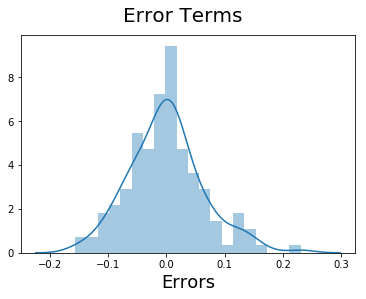

In [154]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions Using the Final Model

##### Create a function to normalize variables in test data set

In [155]:
norm_cols = ['symboling', 'wheelbase','carlength','carwidth' ,'carheight','curbweight','enginesize', 'boreratio', 'stroke','compressionratio','horsepower',
             'peakrpm','citympg', 'highwaympg','price']
gly_norm = gly[norm_cols].apply(lambda x: (x-np.mean(x))/ (max(x) - min(x)))
gly_norm.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.433171,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,0.011671,0.100174,-0.274007,-0.071409,0.028679,-0.051070,-0.117209,-0.098716,0.005419
1,0.433171,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,0.011671,0.100174,-0.274007,-0.071409,0.028679,-0.051070,-0.117209,-0.098716,0.080018
2,0.033171,-0.124099,-0.042526,-0.033984,-0.110407,0.103737,0.094689,-0.464111,0.102184,-0.071409,0.207846,-0.051070,-0.172764,-0.125032,0.080018
3,0.233171,0.030420,0.038071,0.024350,0.047927,-0.084781,-0.067575,-0.099826,0.068850,-0.008909,-0.008821,0.153011,-0.033875,-0.019769,0.016714
4,0.233171,0.018758,0.038071,0.041016,0.047927,0.104125,0.034312,-0.099826,0.068850,-0.133909,0.045346,0.153011,-0.200542,-0.230295,0.103602


Normalizing Numeric columns in the test dataset

In [156]:
gly_test['symboling'] = gly_norm['symboling']
gly_test['wheelbase'] = gly_norm['wheelbase']
gly_test['carlength'] = gly_norm['carlength']
gly_test['carwidth'] = gly_norm['carwidth']
gly_test['carheight'] = gly_norm['carheight']
gly_test['curbweight'] = gly_norm['curbweight']
gly_test['enginesize'] = gly_norm['enginesize']
gly_test['boreratio'] = gly_norm['boreratio']
gly_test['stroke'] = gly_norm['stroke']
gly_test['compressionratio'] = gly_norm['compressionratio']
gly_test['horsepower'] = gly_norm['horsepower']
gly_test['peakrpm']= gly_norm['peakrpm']
gly_test['citympg'] = gly_norm['citympg']
gly_test['highwaympg'] = gly_norm['highwaympg']
gly_test['price'] = gly_norm['price']

gly_test.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
160,-0.166829,-0.089113,-0.115661,-0.125650,-0.060407,-0.179040,-0.109084,-0.099826,-0.107340,-0.071409,...,0,0,0,0,0,0,0,1,0,0
186,0.233171,-0.042466,-0.035064,-0.033984,0.164593,-0.108831,-0.067575,-0.099826,0.068850,-0.071409,...,0,0,0,0,0,0,0,0,1,0
59,0.033171,0.001266,0.055981,0.049350,-0.002073,-0.066162,-0.018518,0.043031,0.064088,-0.096409,...,0,0,0,0,0,0,0,0,0,0
165,0.033171,-0.124099,-0.079840,-0.158984,-0.093740,-0.112710,-0.109084,-0.064111,-0.083531,-0.046409,...,0,0,0,0,0,0,0,1,0,0
140,0.233171,-0.159084,-0.249989,-0.175650,0.164593,-0.122407,-0.071348,0.207317,-0.293055,-0.090159,...,0,0,0,0,0,0,1,0,0,0


In [157]:
y_test = gly_test.pop('price')
x_test = gly_test
x_test_m8 = sm.add_constant(gly_test)
x_test_m8 = x_test_m8.drop(coldrop, axis=1)
x_test_m8 = x_test_m8.drop(['CompanyName_peugeot','enginetype_rotor','curbweight','boreratio','cylindernumber_three',
                              'cylindernumber_two','cylindernumber_five','CompanyName_porsche','cylindernumber_twelve',
                              'stroke'],axis=1)
x_test_m8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 6 columns):
const                  62 non-null float64
carwidth               62 non-null float64
enginesize             62 non-null float64
enginelocation_rear    62 non-null uint8
cylindernumber_four    62 non-null uint8
CompanyName_bmw        62 non-null uint8
dtypes: float64(3), uint8(3)
memory usage: 2.1 KB


In [158]:
# Predict price on test dataset
y_pred_m8 = lm.predict(x_test_m8)
y_pred_m8

160   -0.135708
186   -0.075912
59    -0.015919
165   -0.149943
140   -0.138286
64    -0.015919
198    0.024011
75     0.071254
172   -0.002889
104    0.211275
200    0.105159
136   -0.017796
111    0.047940
41    -0.084710
73     0.584934
31    -0.164766
156   -0.135708
133   -0.017796
65     0.003640
83     0.040796
195    0.044662
197    0.044662
126    0.515150
118   -0.172079
167   -0.002889
101    0.161454
124    0.040796
69     0.300437
11     0.099340
46    -0.067813
         ...   
110    0.108017
201    0.101600
115    0.047940
174   -0.038448
134   -0.017796
169   -0.002889
92    -0.158937
173   -0.015919
74     0.588100
3     -0.051001
157   -0.135708
81    -0.055064
32    -0.185613
99    -0.065936
26    -0.172079
88    -0.077593
184   -0.098441
187   -0.098441
52    -0.155967
168   -0.002889
164   -0.149943
188   -0.075912
7      0.251344
158   -0.113179
123   -0.083533
28    -0.083533
29     0.040796
182   -0.098441
40    -0.180793
128    0.515150
Length: 62, dtype: float

## Model Evaluation

Text(0, 0.5, 'Car Price')

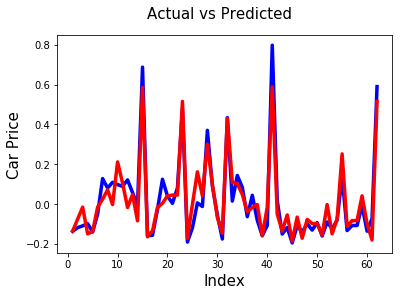

In [159]:
# Actual vs Predicted
g = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(g,y_test, color="blue", linewidth=3.5, linestyle="-")     
plt.plot(g,y_pred_m8, color="red",  linewidth=3.5, linestyle="-")  
fig.suptitle('Actual vs Predicted', fontsize=15)             
plt.xlabel('Index', fontsize=15)                               
plt.ylabel('Car Price', fontsize=15)

###### As Predicted Car prices quite nicely overlap with Actual prices in the graph,it can be said that model predicts Car Price with high degree of accuracy

### Plotting y_test and y_pred to understand the spread.

Text(0, 0.5, 'y_pred')

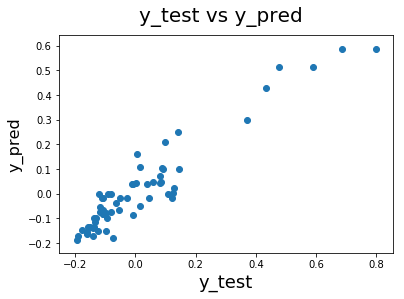

In [160]:
fig = plt.figure()
plt.scatter(y_test,y_pred_m8)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### Calculating Root Mean Square Error

RMSE how close the observed data points are to the model’s predicted values indicating the absolute fit of the model to the dataset.Lower values of RMSE indicate better fit.

In [161]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_m8)
print('Mean_Squared_Error :' ,mse)

Mean_Squared_Error : 0.004584964527745388


###### As RMSE value is lower, it indicates model is good fit

### Calculating R2

In [162]:
r_squared = r2_score(y_test, y_pred_m8)
print('r_square_value :',r_squared)

r_square_value : 0.8937620926737395


###### R2 value of test data is 0.893 which is very close to value of R2 for training model which is 0.890

###### The independent variables significant in predicting the price of a car in US market are:

1)carwidth 

2)enginesize              

3)enginelocation_rear    

4)cylindernumber_four    

5)CompanyName_bmw        

### Recommendations for Geely Auto

##### 1) Geely Auto can make technical collaborations with BMW in the US market.

##### And / OR
   
##### 2) Geely Auto can keep above mentioned variables such as carwidth, enginesize, enginelocation_rear and cylindernumber_four in mind    
#####      while designing their new car for the US market